In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import time
import shutil
import os
import random
import cv2
import math
import json
import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import *

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load Udacity's data - images are in IMG_udacity
df = pd.read_csv('./data/driving_log.csv', header=0)
df.columns = ["center_image", "left_image", "right_image", "steering_angle", "throttle", "break", "speed"]
len(df)

8035

In [3]:
df[0:3]

,center_image,left_image,right_image,steering_angle,throttle,break,speed
0,./data/IMG/center_2016_12_01_13_30_48_404.jpg,./data/IMG/left_2016_12_01_13_30_48_404.jpg,./data/IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
1,./data/IMG/center_2016_12_01_13_31_12_937.jpg,./data/IMG/left_2016_12_01_13_31_12_937.jpg,./data/IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
2,./data/IMG/center_2016_12_01_13_31_13_037.jpg,./data/IMG/left_2016_12_01_13_31_13_037.jpg,./data/IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419


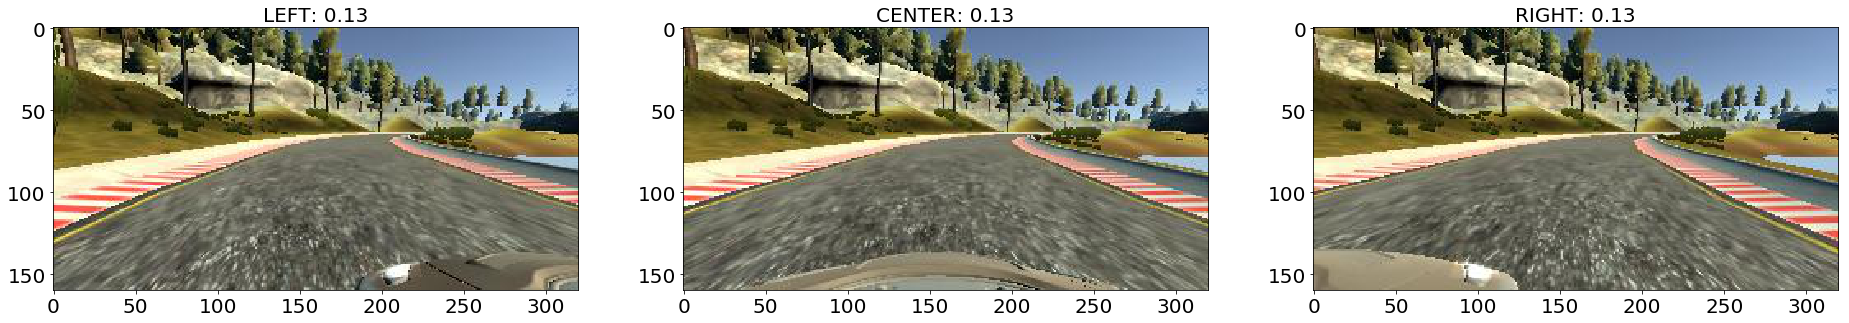

In [4]:
# Visualize left, center and right angle camera at the same moment
df_idx = 275
img_left = mpimg.imread(df["left_image"][df_idx].strip())
img_center = mpimg.imread(df["center_image"][df_idx].strip())
img_right = mpimg.imread(df["right_image"][df_idx].strip())
angle = df["steering_angle"][df_idx]

# Keeping the 640 x 480 perspective 
plt.rcParams["figure.figsize"] = [32, 24]
plt.tick_params(axis='x', labelsize=25)

plt.subplot(1, 3, 1)
plt.imshow(img_left)
plt.title("LEFT: " + str(np.round(angle, 2)), fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.subplot(1, 3, 2)
plt.imshow(img_center)
plt.title("CENTER: " + str(np.round(angle, 2)), fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.subplot(1, 3, 3)
plt.imshow(img_right)
plt.title("RIGHT: " + str(np.round(angle, 2)), fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

#plt.tight_layout()
plt.show()

In [5]:
print('{:}'.format(df.loc[df_idx]["center_image"]))

./data/IMG/center_2016_12_01_13_33_06_209.jpg


In [6]:
min_angle = np.min(df["steering_angle"])
max_angle = np.max(df["steering_angle"])
print(min_angle, max_angle)

-0.9426954 1.0


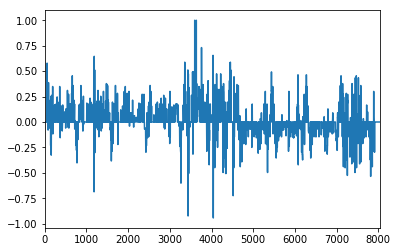

In [7]:
# Time Series plot of steering angles
plt.figure(figsize=(6, 4))
ts = df["steering_angle"]
ts.plot()

(79,)


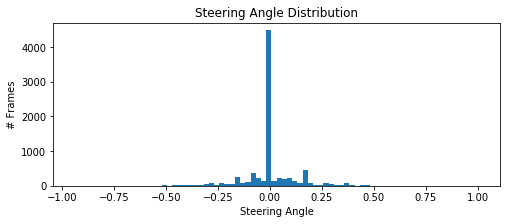

In [8]:
binwidth = 0.025

bins=np.arange(float(min_angle), float(max_angle) + binwidth, binwidth)
print(bins.shape)

plt.figure(figsize=(8,3))
plt.hist(ts.astype('float'), bins=bins)
plt.title("Steering Angle Distribution")
plt.xlabel('Steering Angle', fontsize=10)
plt.ylabel('# Frames', fontsize=10)
plt.show()

In [9]:
def change_brightness(image):
    # Randomly select a percent change
    change_pct = random.uniform(0.4, 1.2)
    
    # Change to HSV to change the brightness V
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * change_pct
    
    #Convert back to RGB 
    img_brightness = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return img_brightness

def flip_image(image, angle):
    img_flip = cv2.flip(image,1)
    angle = -angle
        
    return img_flip, angle

def resizeImage(image):
    # Proportionally get lower half portion of the image
    nrow, ncol, nchannel = image.shape
    
    start_row = int(nrow * 0.35)
    end_row = int(nrow * 0.875)   
    
    # This removes most of the sky and small amount below including the hood
    new_image = image[start_row:end_row, :]
    
    # This resizes to 66 x 220 for NVIDIA's model
    new_image = cv2.resize(new_image, (220,66), interpolation=cv2.INTER_AREA)
    
    return new_image



Steering Angle is:  0.1287396


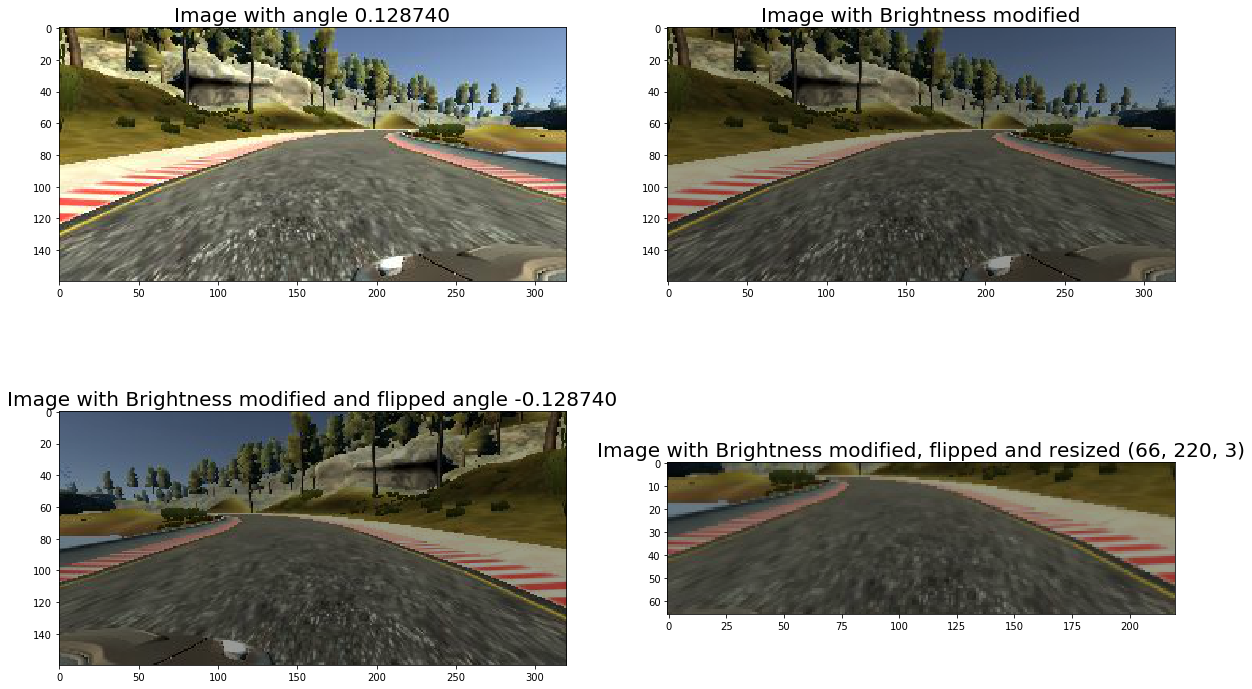

In [10]:
fig = plt.figure(figsize=(20,20))
x = df.iloc[df_idx]
angle = x['steering_angle']
print("Steering Angle is: ", angle)
camera = 'left_image'
image = load_img(x[camera].strip())
image = img_to_array(image).astype(np.uint8)
a = plt.subplot(3,2,1)
a.set_title('Image with angle %f' %angle, fontsize=20)
a.imshow(image)
image = change_brightness(image)
a = plt.subplot(3,2,2)
a.set_title("Image with Brightness modified", fontsize=20)
a.imshow(image)
image, angle = flip_image(image, angle)
a = plt.subplot(3,2,3)
a.set_title('Image with Brightness modified and flipped angle %f' %angle, fontsize=20)
a.imshow(image)
image = resizeImage(image)
a = plt.subplot(3,2,4)
a.set_title("Image with Brightness modified, flipped and resized (66, 220, 3)", fontsize=20)
a.imshow(image)
plt.show()